In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('clientes_compras.csv')

In [4]:
df.head()

,idade,renda,tempo_site,numero_visitas,comprou
0,56,8882,42,5,0
1,69,3906,56,19,0
2,46,5086,36,11,0
3,32,15503,20,12,0
4,60,10152,4,10,0


In [5]:

# Separando features e target
X = df.drop('comprou', axis=1)
y = df['comprou']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # número de árvores
    max_depth=5,       # profundidade máxima de cada árvore
    random_state=42,
    n_jobs=-1         # usa todos os cores disponíveis
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [6]:

# Fazendo previsões
y_pred = rf.predict(X_test)

# Avaliando o modelo
print("\nAcurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 0.995

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       174
           1       1.00      0.96      0.98        26

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



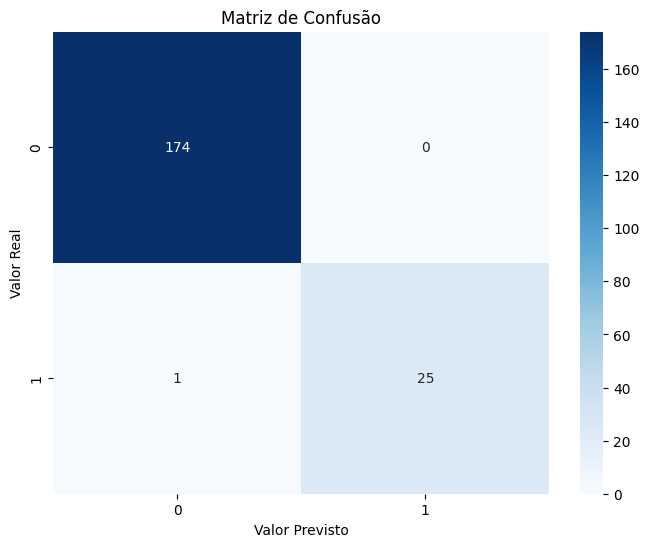

In [7]:

# Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

In [8]:

# Importância das Features
importancias = pd.DataFrame({
    'feature': X.columns,
    'importancia': rf.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nImportância das features:")
print(importancias)


Importância das features:
          feature  importancia
3  numero_visitas     0.332148
2      tempo_site     0.330037
1           renda     0.317466
0           idade     0.020348


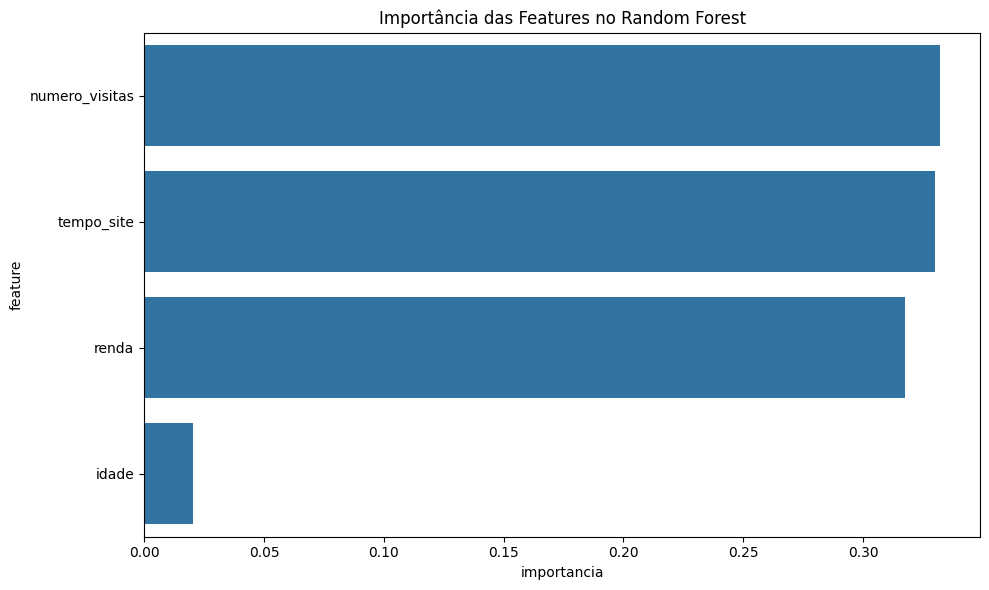

In [9]:

# Visualizando a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=importancias)
plt.title('Importância das Features no Random Forest')
plt.tight_layout()
plt.show()

In [11]:
# idade,renda,tempo_site,numero_visitas,comprou

# Exemplo de como usar o modelo para fazer previsões
print("\nExemplos de previsões:")
exemplos = pd.DataFrame({
    'idade': [25, 45, 35],
    'renda': [5000, 15000, 8000],
    'tempo_site': [15, 45, 25],
    'numero_visitas': [5, 15, 8]
})

previsoes = rf.predict(exemplos)
probabilidades = rf.predict_proba(exemplos)

print("\nPrevisões e Probabilidades para os exemplos:")
for i, (previsao, prob) in enumerate(zip(previsoes, probabilidades)):
    print(f"Cliente {i+1}:")
    print(f"Previsão: {'Comprou' if previsao == 1 else 'Não Comprou'}")
    print(f"Probabilidade de compra: {prob[1]:.2%}")
    print()



Exemplos de previsões:

Previsões e Probabilidades para os exemplos:
Cliente 1:
Previsão: Não Comprou
Probabilidade de compra: 0.00%

Cliente 2:
Previsão: Comprou
Probabilidade de compra: 92.27%

Cliente 3:
Previsão: Não Comprou
Probabilidade de compra: 0.00%



In [12]:

# Comparando com uma única árvore de decisão
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\nComparação com Árvore de Decisão única:")
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred))
print("Acurácia Árvore de Decisão:", accuracy_score(y_test, dt_pred)) 


Comparação com Árvore de Decisão única:
Acurácia Random Forest: 0.995
Acurácia Árvore de Decisão: 1.0
